In [80]:
# importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [81]:
#fetching dataset from car csv
df1 = pd.read_csv('car data.csv')
df1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [82]:
#fetching dataset from Electric_Vehicle_Population_Data csv
df2 = pd.read_csv('Electric_Vehicle_Population_Data.csv')
df2.head()

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location
0,WA1AAAGE2M,Kitsap,POULSBO,WA,98370,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,23.0,148815901,POINT (-122.63339300000001 47.748427)
1,WBY8P2C00L,King,SEATTLE,WA,98122,2020,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,37.0,132197810,POINT (-122.303413 47.61065)
2,5YJXCBE21K,Cowlitz,SILVERLAKE,WA,98645,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,20.0,154341673,POINT (-122.772699 46.320526)
3,1FTZR081XY,King,SEATTLE,WA,98117,2000,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,58,0,36.0,169378338,POINT (-122.379354 47.687571)
4,WBY1Z6C55H,King,SEATTLE,WA,98119,2017,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,36.0,192605101,POINT (-122.36772100000002 47.639264)


In [83]:
# checking the shape  of the datasets
print(df1.shape)
print(df2.shape)     

(301, 9)
(79767, 15)


In [84]:
# getting a statistical summary of the datasets
d1 = df1.describe()
d2 = df2.describe()

In [85]:
print(d1)
print(d2)

              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000
           ZIP Code    Model Year  Electric Range      Base MSRP   
count  79767.000000  79767.000000    79767.000000   79767.000000  \
mean   98175.310717   2017.628593      124.564657    2944.268244   
std     2421.827066      2.575634      102.889970   13198.091967   
min     1731.000000   1993.000000        0.0

In [86]:
# Gethering information of dataset data
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79767 entries, 0 to 79766
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         79767 non-null  object 


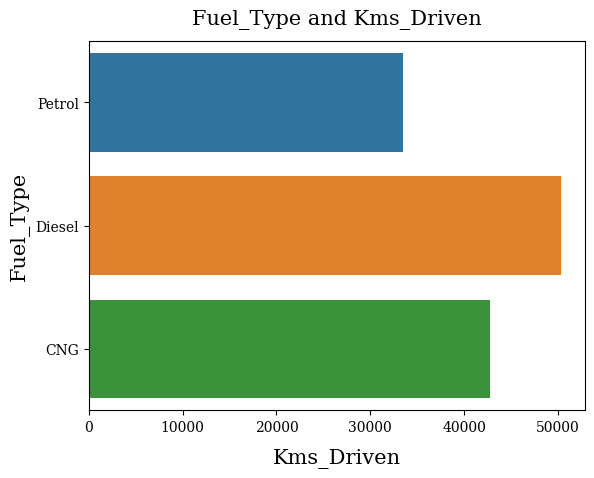

In [87]:
#Fuel_Type and Kms_Driven data visualization from dataset 1
sns.barplot(data=df1, y=df1['Fuel_Type'].sort_values(ascending=False), x='Kms_Driven',errorbar=('ci', 0))
plt.ylabel('Fuel_Type', family='serif', fontsize=15)
plt.xlabel('Kms_Driven', family='serif', fontsize=15, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Fuel_Type and Kms_Driven', weight=200, family='serif', size=15, pad=12)
plt.show()   

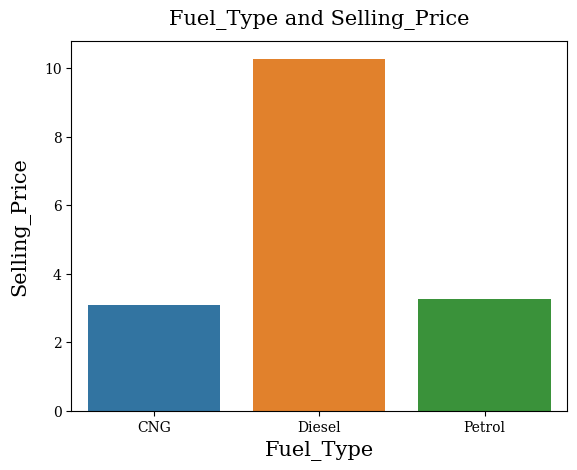

In [88]:
#Fuel_Type and Selling_Price data visualization from dataset 1
sns.barplot(data=df1, x=df1['Fuel_Type'].sort_values(ascending=True), y='Selling_Price',errorbar=('ci', 0))
plt.xlabel('Fuel_Type', family='serif', fontsize=15)
plt.ylabel('Selling_Price', family='serif', fontsize=15, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Fuel_Type and Selling_Price', weight=200, family='serif', size=15, pad=12)
plt.show()   

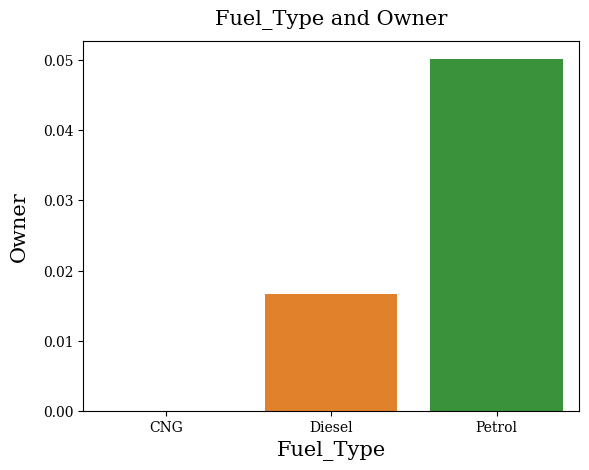

In [89]:
#Fuel_Type and Owner data visualization from dataset 1
sns.barplot(data=df1, x=df1['Fuel_Type'].sort_values(ascending=True), y='Owner',errorbar=('ci', 0))
plt.xlabel('Fuel_Type', family='serif', fontsize=15)
plt.ylabel('Owner', family='serif', fontsize=15, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Fuel_Type and Owner', weight=200, family='serif', size=15, pad=12)
plt.show() 

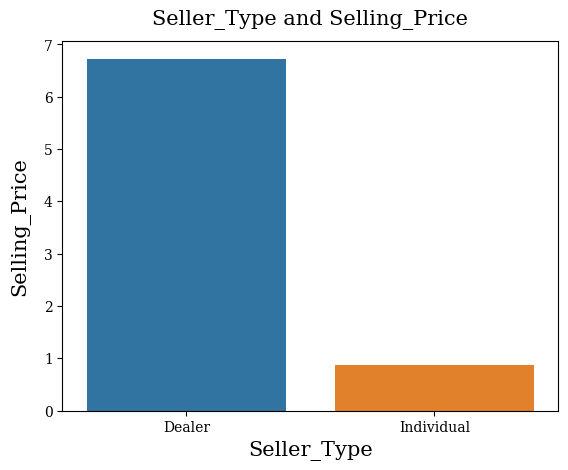

In [90]:
#Seller_Type and Selling_Price data visualization from dataset 1
sns.barplot(data=df1, x=df1['Seller_Type'].sort_values(ascending=True), y='Selling_Price',errorbar=('ci', 0))
plt.xlabel('Seller_Type', family='serif', fontsize=15)
plt.ylabel('Selling_Price', family='serif', fontsize=15, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Seller_Type and Selling_Price', weight=200, family='serif', size=15, pad=12)
plt.show()   

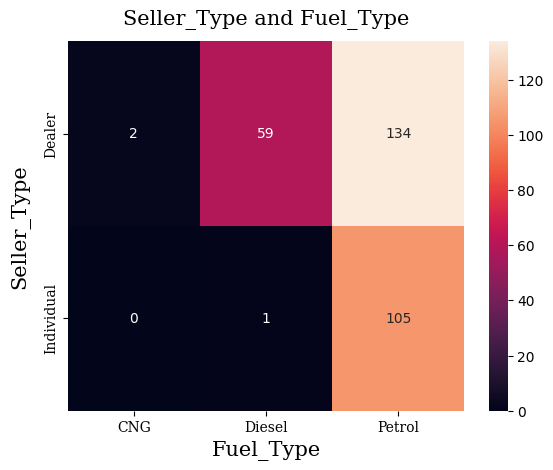

In [91]:
#Seller_Type and Selling_Price data visualization from dataset 
cross_tab = pd.crosstab(df1['Seller_Type'], df1['Fuel_Type'])

# Create a heatmap using Seaborn
sns.heatmap(cross_tab, annot=True, fmt='d')
plt.xlabel('Fuel_Type', family='serif', fontsize=15)
plt.ylabel('Seller_Type', family='serif', fontsize=15, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Seller_Type and Fuel_Type', weight=200, family='serif', size=15, pad=12)
plt.show() 

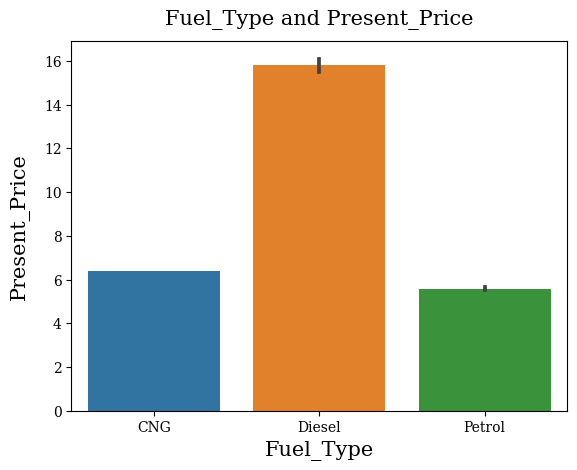

In [92]:
#Fuel_Type and Selling_Price data visualization from dataset 1
sns.barplot(data=df1, x=df1['Fuel_Type'].sort_values(ascending=True), y='Present_Price',errorbar=('ci',16))
plt.xlabel('Fuel_Type', family='serif', fontsize=15)
plt.ylabel('Present_Price', family='serif', fontsize=15, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Fuel_Type and Present_Price', weight=200, family='serif', size=15, pad=12)
plt.show()  

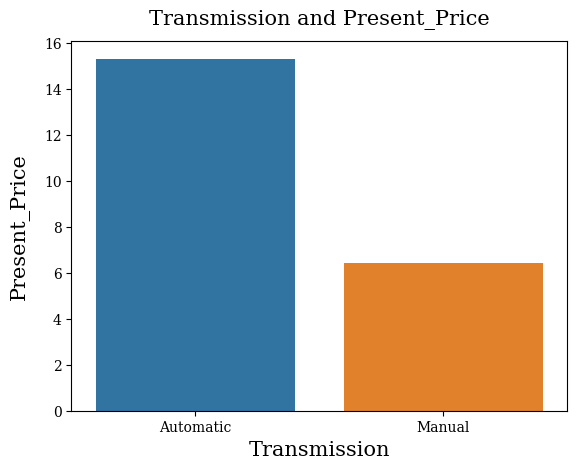

In [93]:
#Transmission and Present_Price data visualization from dataset 1
sns.barplot(data=df1, x=df1['Transmission'].sort_values(ascending=True), y='Present_Price',errorbar=('ci',0))
plt.xlabel('Transmission', family='serif', fontsize=15)
plt.ylabel('Present_Price', family='serif', fontsize=15, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Transmission and Present_Price', weight=200, family='serif', size=15, pad=12)
plt.show()

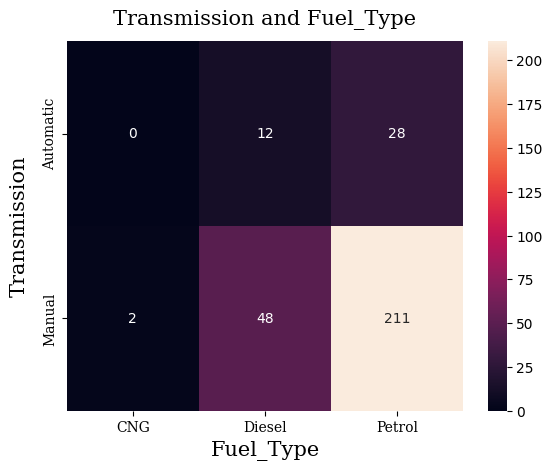

In [94]:
#Transmission and Fuel_Type data visualization from dataset 
cross_tab = pd.crosstab(df1['Transmission'], df1['Fuel_Type'])

# Create a heatmap using Seaborn
sns.heatmap(cross_tab, annot=True, fmt='d')
plt.xlabel('Fuel_Type', family='serif', fontsize=15)
plt.ylabel('Transmission', family='serif', fontsize=15, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Transmission and Fuel_Type', weight=200, family='serif', size=15, pad=12)
plt.show()

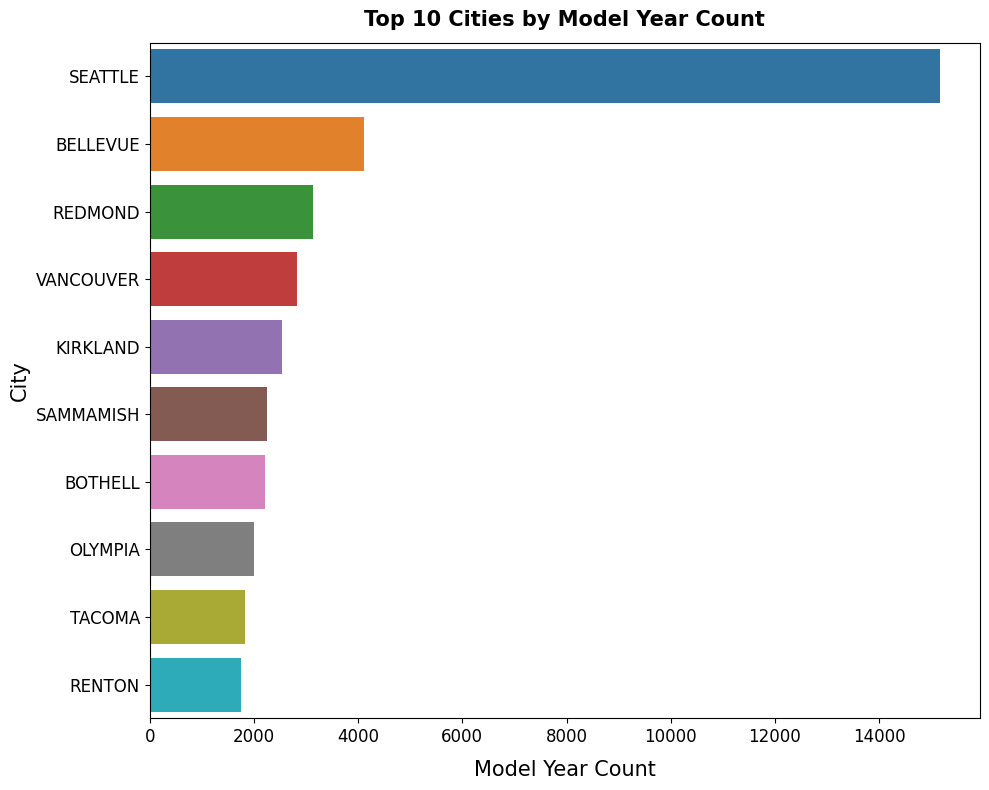

In [95]:
# #County   and Model Year visualization from dataset 2
model_year_count = df2.groupby('City')['Model Year'].count().reset_index()
model_year_count = model_year_count.sort_values(by='Model Year', ascending=False)
top_n = 10
model_year_count_top = model_year_count.head(top_n)

plt.figure(figsize=(10, 8))
sns.barplot(data=model_year_count_top, y='City', x='Model Year', errorbar=('ci',0))
plt.xticks(rotation=0)
plt.xlabel('Model Year Count', fontsize=15, labelpad=10)
plt.ylabel('City', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Top {} Cities by Model Year Count'.format(top_n), weight='bold', size=15, pad=12)
plt.tight_layout()
plt.show()


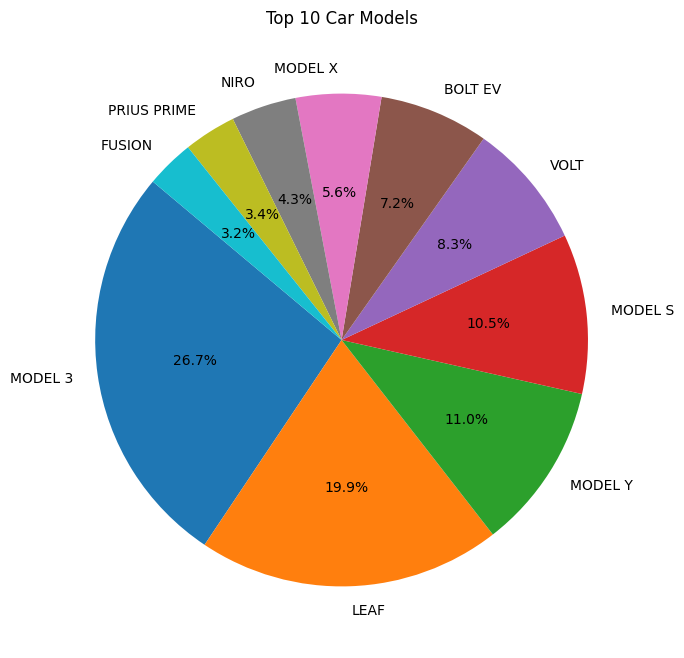

In [96]:
# Calculate the distribution of 'Model'
model_counts = df2['Model'].value_counts()

# Set the number of top models to display
top_n = 10  # Change this value as needed

# Select the top N most common car models
top_model_counts = model_counts.head(top_n)

# Create a pie chart using matplotlib
plt.figure(figsize=(8, 8))
plt.pie(top_model_counts, labels=top_model_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top {} Car Models'.format(top_n))
# Show the plot
plt.show()


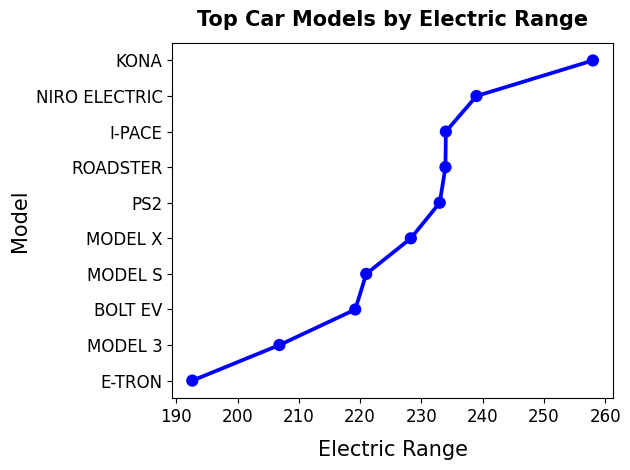

In [97]:
# data visuliazation of dataset -2
top_n = 10
model_mean_range = df2.groupby('Model')['Electric Range'].mean().reset_index()
top_models = model_mean_range.nlargest(top_n, 'Electric Range')
sns.pointplot(data=top_models, y='Model', x='Electric Range', errorbar=('ci',0), color='blue')
plt.xlabel('Electric Range', fontsize=15, labelpad=10)
plt.ylabel('Model', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(f'Top Car Models by Electric Range', weight='bold', size=15, pad=12)
plt.tight_layout()
plt.show()

In [103]:
df2['Electric Vehicle Type'].replace(to_replace=['RWD','FWD','AWD'],value=[0, 1, 2],inplace=True)
df2['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)


In [131]:
X = df2[['ZIP Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID']]


In [132]:
# feature scaling
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


In [137]:
# applying Principle Component Analysis (PCA)
X_cleaned = X.dropna()

pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_cleaned)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-5.123104e+07,-2924.931136,106.322406,-102.640945,4.947818,2.807767
1,-6.784913e+07,-2919.386358,-139.620183,-24.739293,-3.811200,1.926240
2,-4.570527e+07,-2926.797038,378.799405,-179.683352,2.134849,0.671679
3,-3.066860e+07,-2931.747018,-140.139566,70.929809,-2.886771,-17.628323
4,-7.441840e+06,-2939.456496,-138.417050,48.103093,-2.921532,-0.661696


C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

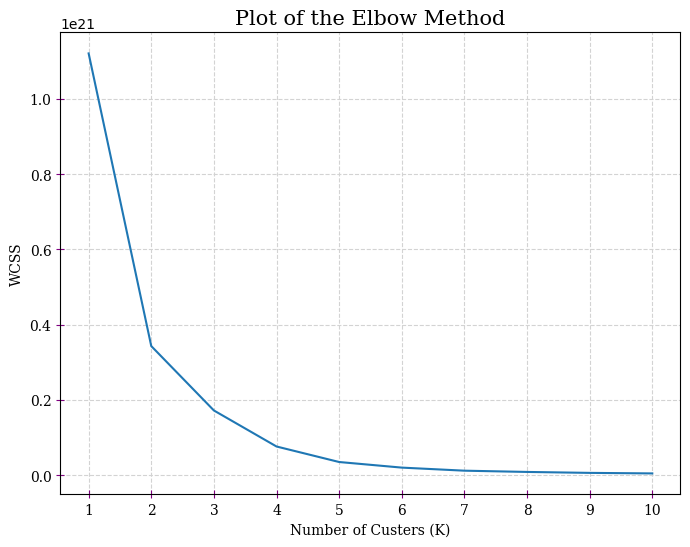

In [138]:
wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [139]:
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)

C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=90)

In [143]:
print(kmean.labels_)

pd.Series(kmean.labels_).value_counts()


[1 1 1 ... 1 1 3]


1    47410
3    19239
0     7430
2     5542
Name: count, dtype: int64

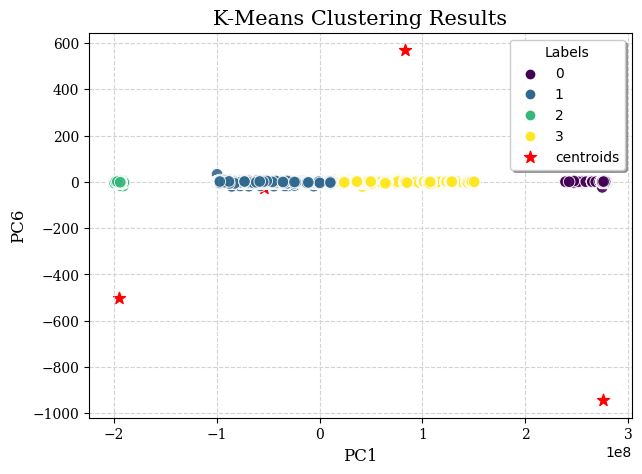

In [146]:
# visualizing clusters
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC6', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC6', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()